# Customer churn prediction: Telecom Churn Dataset

Customer churn, also known as customer retention, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics  because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics  use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

**Please upvote for this kernel as well as the Telecom Churn Dataset if you find them useful.**

- <a href='#1'>1. Data overview</a>
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1. Customer churn in data</a>
    - <a href='#2.2'>2.2. Variable distributions</a>
- <a href='#3'>3. Data preprocessing</a>
    - <a href='#3.1'>3.1. Variable summary</a>
    - <a href='#3.2'>3.2. Correlation matrix</a>
    - <a href='#3.3'>3.3. Visualizing data with principal components</a>
    - <a href='#3.4'>3.4. Binary variable distributions in customer churn (Radar Chart)</a>
- <a href='#4'>4. Model Building</a>
    - <a href='#4.1'>4.1. Baseline model</a>
    - <a href='#4.2'>4.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
    - <a href='#4.3'>4.3. Recursive Feature Elimination</a>
    - <a href='#4.4'>4.4. Univariate Selection</a>
    - <a href='#4.5'>4.5. Decision Tree Classifier</a> 
    - <a href='#4.6'>4.6. KNN Classifier</a>
    - <a href='#4.7'>4.7. Random Forest Classifier</a>
    - <a href='#4.8'>4.8. Gaussian Naive Bayes</a>
    - <a href='#4.9'>4.9. Support Vector Machine</a>
        - <a href='#4.9.1'>4.9.1. Support Vector Machine (linear)</a>
        - <a href='#4.9.2'>4.9.2. Support Vector Machine (rbf)</a>
    - <a href='#4.11'>4.11. XGBoost Classifier</a>
    - <a href='#4.12'>4.12. Gaussian Process Classifier</a> 
    - <a href='#4.13'>4.13. AdaBoost Classifier</a> 
    - <a href='#4.14'>4.14. GradientBoosting Classifier</a>
    - <a href='#4.15'>4.15. Linear Discriminant Analysis</a> 
    - <a href='#4.16'>4.16. Quadratic Discriminant Analysis</a> 
    - <a href='#4.17'>4.17. Multi-layer Perceptron Classifier</a> 
    - <a href='#4.18'>4.18. Bagging Classifier</a>
- <a href='#5'>5. Model performances over the training dataset</a>
    - <a href='#5.1'>5.1. Model performance metrics</a>
    - <a href='#5.2'>5.2. Compare model metrics</a>
    - <a href='#5.3'>5.3. Confusion matrices for models</a>
    - <a href='#5.4'>5.4. ROC - Curves for models</a>
    - <a href='#5.5'>5.5. Precision recall curves</a>
- <a href='#6'>6. Model performances over the principal test dataset</a>
    - <a href='#6.1'>6.1. Model performance metrics</a>
    - <a href='#6.2'>6.2. Compare model metrics</a>
    - <a href='#6.3'>6.3. Confusion matrices for models</a>
    - <a href='#6.4'>6.4. ROC - Curves for models</a>
    - <a href='#6.5'>6.5. Precision recall curves</a>
    

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing libraries
import numpy as np 
import pandas as pd 
from math import * 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns 
import itertools
import io
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 
%matplotlib inline

# <a id='1'>1. Data overview</a>

In [3]:
telcom = pd.read_csv("churn-bigml-80.csv")
telcom_test = pd.read_csv("churn-bigml-20.csv")
telcom.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [4]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(telcom.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [5]:
dataoveriew(telcom, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 2666

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         15

In [6]:
dataoveriew(telcom_test, 'Overiew of the test dataset')

Overiew of the test dataset:

Rows: 667

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls   

# <a id='2'>2. Exploratory Data Analysis</a>

## <a id='2.1'>2.1. Customer churn in data</a>

In [7]:
trace = go.Pie(labels = telcom["Churn"].value_counts().keys().tolist(),
               values = telcom["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## <a id='2.2'>2.2. Variable distributions</a>

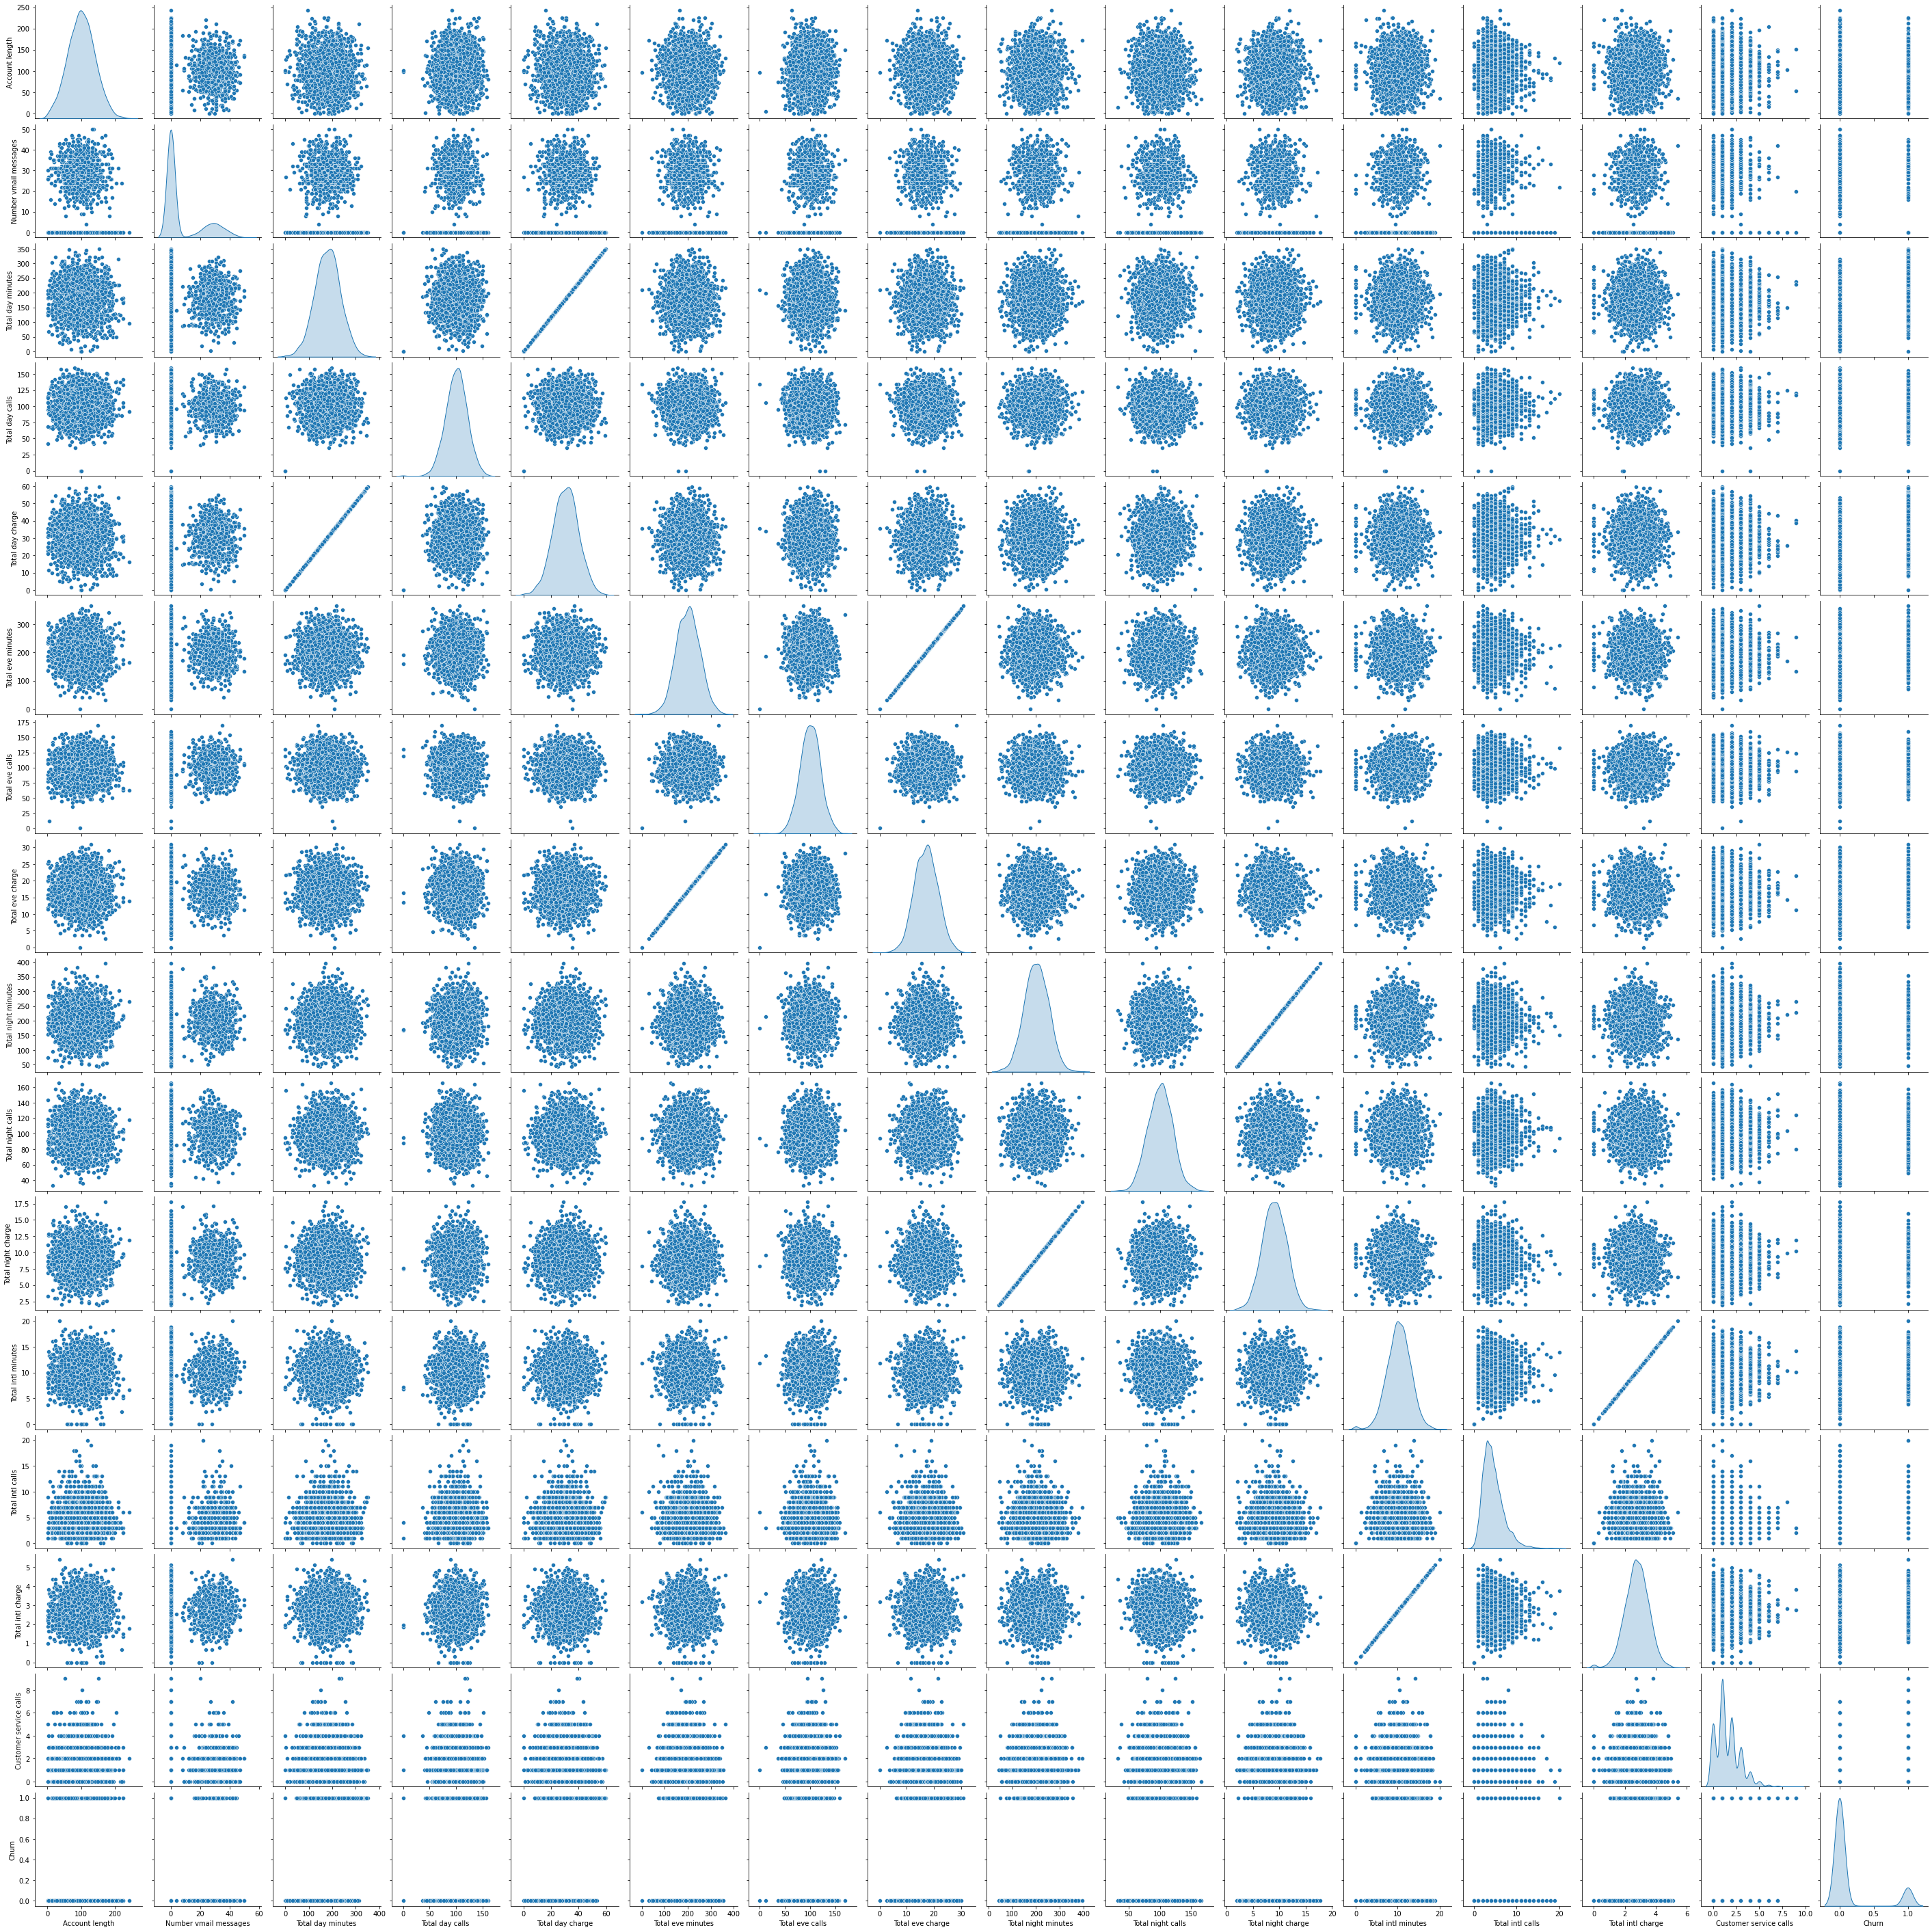

In [7]:
#Separating columns to be visualized
out_cols = list(set(telcom.nunique()[telcom.nunique()<6].keys().tolist()
                    + telcom.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in telcom.columns if x not in out_cols] + ['Churn']

sns.pairplot(telcom[viz_cols], diag_kind="kde")
plt.show()

Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.

# <a id='3'>3. Data preprocessing</a>

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [9]:
#Removing correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']
   
telcom = telcom.drop(columns = col_to_drop, axis = 1)
telcom_test = telcom_test.drop(columns = col_to_drop, axis = 1)

In [10]:
telcom

Account length International plan Voice mail plan  \
0                128                 No             Yes   
1                107                 No             Yes   
2                137                 No              No   
3                 84                Yes              No   
4                 75                Yes              No   
...              ...                ...             ...   
2661              79                 No              No   
2662             192                 No             Yes   
2663              68                 No              No   
2664              28                 No              No   
2665              74                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
2661                      0              134.7               98   
2662                     36              156.2               77   
2663                      0              231.1               57   
2664                      0              180.8              109   
2665                     25              234.4              113   

      Total eve minutes  Total eve calls  Total night minutes  \
0                 197.4               99                244.7   
1                 195.5              103                254.4   
2                 121.2              110                162.6   
3                  61.9               88                196.9   
4                 148.3              122                186.9   
...                 ...              ...                  ...   
2661              189.7               68                221.4   
2662              215.5              126                279.1   
2663              153.4               55                191.3   
2664              288.8               58                191.9   
2665              265.9               82                241.4   

      Total night calls  Total intl minutes  Total intl calls  \
0                    91                10.0                 3   
1                   103                13.7                 3   
2                   104                12.2                 5   
3                    89                 6.6                 7   
4                   121                10.1                 3   
...                 ...                 ...               ...   
2661                128                11.8                 5   
2662                 83                 9.9                 6   
2663                123                 9.6                 4   
2664                 91                14.1                 6   
2665                 77                13.7                 4   

      Customer service calls  Churn  
0                          1  False  
1                          1  False  
2                          0  False  
3                          2  False  
4                          3  False  
...                      ...    ...  
2661                       2  False  
2662                       2  False  
2663                       3  False  
2664                       2  False  
2665                       0  False  

[2666 rows x 14 columns]

In [11]:
telcom_test

Account length International plan Voice mail plan  Number vmail messages  \
0               117                 No              No                      0   
1                65                 No              No                      0   
2               161                 No              No                      0   
3               111                 No              No                      0   
4                49                 No              No                      0   
..              ...                ...             ...                    ...   
662             114                 No             Yes                     26   
663             106                 No             Yes                     29   
664              60                 No              No                      0   
665             159                 No              No                      0   
666             184                Yes              No                      0   

     Total day minutes  Total day calls  Total eve minutes  Total eve calls  \
0                184.5               97              351.6               80   
1                129.1              137              228.5               83   
2                332.9               67              317.8               97   
3                110.4              103              137.3              102   
4                119.3              117              215.1              109   
..                 ...              ...                ...              ...   
662              137.1               88              155.7              125   
663               83.6              131              203.9              131   
664              193.9              118               85.0              110   
665              169.8              114              197.7              105   
666              213.8              105              159.6               84   

     Total night minutes  Total night calls  Total intl minutes  \
0                  215.8                 90                 8.7   
1                  208.8                111                12.7   
2                  160.6                128                 5.4   
3                  189.6                105                 7.7   
4                  178.7                 90                11.1   
..                   ...                ...                 ...   
662                247.6                 94                11.5   
663                229.5                 73                 8.1   
664                210.1                134                13.2   
665                193.7                 82                11.6   
666                139.2                137                 5.0   

     Total intl calls  Customer service calls  Churn  
0                   4                       1  False  
1                   6                       4   True  
2                   9                       4   True  
3                   6                       2  False  
4                   1                       1  False  
..                ...                     ...    ...  
662                 7                       2  False  
663                 3                       1  False  
664                 8                       3  False  
665                 4                       1  False  
666                10                       2  False  

[667 rows x 14 columns]

In [12]:
#target column
target_col = ["Churn"]

#number of levels in feature to be a categorical feature
nlevels = 6

In [13]:
#Separating categorical and numerical columns
#categorical columns
cat_cols = list(set(telcom.nunique()[telcom.nunique()<nlevels].keys().tolist() 
                    + telcom.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in telcom.columns if x not in cat_cols + target_col]

#Binary columns with 2 values
bin_cols = telcom.nunique()[telcom.nunique() == 2].keys().tolist()

In [14]:
cat_cols

['International plan', 'Voice mail plan']

In [15]:
cat_cols

['International plan', 'Voice mail plan']

In [16]:
num_cols

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total eve minutes',
 'Total eve calls',
 'Total night minutes',
 'Total night calls',
 'Total intl minutes',
 'Total intl calls',
 'Customer service calls']

In [17]:
bin_cols

['International plan', 'Voice mail plan', 'Churn']

In [18]:
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    telcom[i] = le.fit_transform(telcom[i])
    telcom_test[i] = le.transform(telcom_test[i])

In [19]:
telcom

Account length  International plan  Voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
2661              79                   0                0   
2662             192                   0                1   
2663              68                   0                0   
2664              28                   0                0   
2665              74                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
2661                      0              134.7               98   
2662                     36              156.2               77   
2663                      0              231.1               57   
2664                      0              180.8              109   
2665                     25              234.4              113   

      Total eve minutes  Total eve calls  Total night minutes  \
0                 197.4               99                244.7   
1                 195.5              103                254.4   
2                 121.2              110                162.6   
3                  61.9               88                196.9   
4                 148.3              122                186.9   
...                 ...              ...                  ...   
2661              189.7               68                221.4   
2662              215.5              126                279.1   
2663              153.4               55                191.3   
2664              288.8               58                191.9   
2665              265.9               82                241.4   

      Total night calls  Total intl minutes  Total intl calls  \
0                    91                10.0                 3   
1                   103                13.7                 3   
2                   104                12.2                 5   
3                    89                 6.6                 7   
4                   121                10.1                 3   
...                 ...                 ...               ...   
2661                128                11.8                 5   
2662                 83                 9.9                 6   
2663                123                 9.6                 4   
2664                 91                14.1                 6   
2665                 77                13.7                 4   

      Customer service calls  Churn  
0                          1      0  
1                          1      0  
2                          0      0  
3                          2      0  
4                          3      0  
...                      ...    ...  
2661                       2      0  
2662                       2      0  
2663                       3      0  
2664                       2      0  
2665                       0      0  

[2666 rows x 14 columns]

In [20]:
telcom_test

Account length  International plan  Voice mail plan  \
0               117                   0                0   
1                65                   0                0   
2               161                   0                0   
3               111                   0                0   
4                49                   0                0   
..              ...                 ...              ...   
662             114                   0                1   
663             106                   0                1   
664              60                   0                0   
665             159                   0                0   
666             184                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0              184.5               97   
1                        0              129.1              137   
2                        0              332.9               67   
3                        0              110.4              103   
4                        0              119.3              117   
..                     ...                ...              ...   
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total eve minutes  Total eve calls  Total night minutes  \
0                351.6               80                215.8   
1                228.5               83                208.8   
2                317.8               97                160.6   
3                137.3              102                189.6   
4                215.1              109                178.7   
..                 ...              ...                  ...   
662              155.7              125                247.6   
663              203.9              131                229.5   
664               85.0              110                210.1   
665              197.7              105                193.7   
666              159.6               84                139.2   

     Total night calls  Total intl minutes  Total intl calls  \
0                   90                 8.7                 4   
1                  111                12.7                 6   
2                  128                 5.4                 9   
3                  105                 7.7                 6   
4                   90                11.1                 1   
..                 ...                 ...               ...   
662                 94                11.5                 7   
663                 73                 8.1                 3   
664                134                13.2                 8   
665                 82                11.6                 4   
666                137                 5.0                10   

     Customer service calls  Churn  
0                         1      0  
1                         4      1  
2                         4      1  
3                         2      0  
4                         1      0  
..                      ...    ...  
662                       2      0  
663                       1      0  
664                       3      0  
665                       1      0  
666                       2      0  

[667 rows x 14 columns]

In [21]:
#combining the train and test datasets
trainsize = telcom.shape[0]
comb = pd.concat((telcom, telcom_test), sort=False)

In [22]:
comb

Account length  International plan  Voice mail plan  \
0               128                   0                1   
1               107                   0                1   
2               137                   0                0   
3                84                   1                0   
4                75                   1                0   
..              ...                 ...              ...   
662             114                   0                1   
663             106                   0                1   
664              60                   0                0   
665             159                   0                0   
666             184                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0                       25              265.1              110   
1                       26              161.6              123   
2                        0              243.4              114   
3                        0              299.4               71   
4                        0              166.7              113   
..                     ...                ...              ...   
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total eve minutes  Total eve calls  Total night minutes  \
0                197.4               99                244.7   
1                195.5              103                254.4   
2                121.2              110                162.6   
3                 61.9               88                196.9   
4                148.3              122                186.9   
..                 ...              ...                  ...   
662              155.7              125                247.6   
663              203.9              131                229.5   
664               85.0              110                210.1   
665              197.7              105                193.7   
666              159.6               84                139.2   

     Total night calls  Total intl minutes  Total intl calls  \
0                   91                10.0                 3   
1                  103                13.7                 3   
2                  104                12.2                 5   
3                   89                 6.6                 7   
4                  121                10.1                 3   
..                 ...                 ...               ...   
662                 94                11.5                 7   
663                 73                 8.1                 3   
664                134                13.2                 8   
665                 82                11.6                 4   
666                137                 5.0                10   

     Customer service calls  Churn  
0                         1      0  
1                         1      0  
2                         0      0  
3                         2      0  
4                         3      0  
..                      ...    ...  
662                       2      0  
663                       1      0  
664                       3      0  
665                       1      0  
666                       2      0  

[3333 rows x 14 columns]

In [23]:
#Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

In [24]:
comb

Account length  International plan  Voice mail plan  \
0               128                   0                1   
1               107                   0                1   
2               137                   0                0   
3                84                   1                0   
4                75                   1                0   
..              ...                 ...              ...   
662             114                   0                1   
663             106                   0                1   
664              60                   0                0   
665             159                   0                0   
666             184                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0                       25              265.1              110   
1                       26              161.6              123   
2                        0              243.4              114   
3                        0              299.4               71   
4                        0              166.7              113   
..                     ...                ...              ...   
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total eve minutes  Total eve calls  Total night minutes  \
0                197.4               99                244.7   
1                195.5              103                254.4   
2                121.2              110                162.6   
3                 61.9               88                196.9   
4                148.3              122                186.9   
..                 ...              ...                  ...   
662              155.7              125                247.6   
663              203.9              131                229.5   
664               85.0              110                210.1   
665              197.7              105                193.7   
666              159.6               84                139.2   

     Total night calls  Total intl minutes  Total intl calls  \
0                   91                10.0                 3   
1                  103                13.7                 3   
2                  104                12.2                 5   
3                   89                 6.6                 7   
4                  121                10.1                 3   
..                 ...                 ...               ...   
662                 94                11.5                 7   
663                 73                 8.1                 3   
664                134                13.2                 8   
665                 82                11.6                 4   
666                137                 5.0                10   

     Customer service calls  Churn  
0                         1      0  
1                         1      0  
2                         0      0  
3                         2      0  
4                         3      0  
..                      ...    ...  
662                       2      0  
663                       1      0  
664                       3      0  
665                       1      0  
666                       2      0  

[3333 rows x 14 columns]

In [25]:
# Separating the train and test datasets
telcom = comb[:trainsize]
telcom_test = comb[trainsize:] 

In [26]:
telcom

Account length  International plan  Voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
2661              79                   0                0   
2662             192                   0                1   
2663              68                   0                0   
2664              28                   0                0   
2665              74                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
2661                      0              134.7               98   
2662                     36              156.2               77   
2663                      0              231.1               57   
2664                      0              180.8              109   
2665                     25              234.4              113   

      Total eve minutes  Total eve calls  Total night minutes  \
0                 197.4               99                244.7   
1                 195.5              103                254.4   
2                 121.2              110                162.6   
3                  61.9               88                196.9   
4                 148.3              122                186.9   
...                 ...              ...                  ...   
2661              189.7               68                221.4   
2662              215.5              126                279.1   
2663              153.4               55                191.3   
2664              288.8               58                191.9   
2665              265.9               82                241.4   

      Total night calls  Total intl minutes  Total intl calls  \
0                    91                10.0                 3   
1                   103                13.7                 3   
2                   104                12.2                 5   
3                    89                 6.6                 7   
4                   121                10.1                 3   
...                 ...                 ...               ...   
2661                128                11.8                 5   
2662                 83                 9.9                 6   
2663                123                 9.6                 4   
2664                 91                14.1                 6   
2665                 77                13.7                 4   

      Customer service calls  Churn  
0                          1      0  
1                          1      0  
2                          0      0  
3                          2      0  
4                          3      0  
...                      ...    ...  
2661                       2      0  
2662                       2      0  
2663                       3      0  
2664                       2      0  
2665                       0      0  

[2666 rows x 14 columns]

In [27]:
telcom_test

Account length  International plan  Voice mail plan  \
0               117                   0                0   
1                65                   0                0   
2               161                   0                0   
3               111                   0                0   
4                49                   0                0   
..              ...                 ...              ...   
662             114                   0                1   
663             106                   0                1   
664              60                   0                0   
665             159                   0                0   
666             184                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0              184.5               97   
1                        0              129.1              137   
2                        0              332.9               67   
3                        0              110.4              103   
4                        0              119.3              117   
..                     ...                ...              ...   
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total eve minutes  Total eve calls  Total night minutes  \
0                351.6               80                215.8   
1                228.5               83                208.8   
2                317.8               97                160.6   
3                137.3              102                189.6   
4                215.1              109                178.7   
..                 ...              ...                  ...   
662              155.7              125                247.6   
663              203.9              131                229.5   
664               85.0              110                210.1   
665              197.7              105                193.7   
666              159.6               84                139.2   

     Total night calls  Total intl minutes  Total intl calls  \
0                   90                 8.7                 4   
1                  111                12.7                 6   
2                  128                 5.4                 9   
3                  105                 7.7                 6   
4                   90                11.1                 1   
..                 ...                 ...               ...   
662                 94                11.5                 7   
663                 73                 8.1                 3   
664                134                13.2                 8   
665                 82                11.6                 4   
666                137                 5.0                10   

     Customer service calls  Churn  
0                         1      0  
1                         4      1  
2                         4      1  
3                         2      0  
4                         1      0  
..                      ...    ...  
662                       2      0  
663                       1      0  
664                       3      0  
665                       1      0  
666                       2      0  

[667 rows x 14 columns]

In [28]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(telcom_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

In [29]:
scaled_test

Account length  Number vmail messages  Total day minutes  \
0          0.414080              -0.589414           0.092590   
1         -0.900493              -0.589414          -0.929547   
2          1.526412              -0.589414           2.830588   
3          0.262399              -0.589414          -1.274564   
4         -1.304977              -0.589414          -1.110358   
..              ...                    ...                ...   
662        0.338240               1.320985          -0.781946   
663        0.135998               1.541416          -1.769028   
664       -1.026894              -0.589414           0.266021   
665        1.475851              -0.589414          -0.178627   
666        2.107858              -0.589414           0.633178   

     Total day calls  Total eve minutes  Total eve calls  Total night minutes  \
0          -0.165639           2.968355        -0.993351             0.288179   
1           1.835921           0.551880        -0.844524             0.150304   
2          -1.666809           2.304855        -0.149999            -0.799061   
3           0.134595          -1.238393         0.098046            -0.227866   
4           0.835141           0.288835         0.445308            -0.442556   
..               ...                ...              ...                  ...   
662        -0.615990          -0.877198         1.239051             0.914523   
663         1.535687           0.068977         1.536704             0.558019   
664         0.885180          -2.265051         0.494917             0.175909   
665         0.685024          -0.052730         0.246872            -0.147111   
666         0.234673          -0.800640        -0.794915            -1.220563   

     Total night calls  Total intl minutes  Total intl calls  \
0            -0.520538           -0.551334         -0.190317   
1             0.561110            0.883476          0.624104   
2             1.436730           -1.735052          1.845734   
3             0.252068           -0.910036          0.624104   
4            -0.520538            0.309552         -1.411947   
..                 ...                 ...               ...   
662          -0.314510            0.453033          1.031314   
663          -1.396158           -0.766555         -0.597527   
664           1.745772            1.062828          1.438524   
665          -0.932595            0.488904         -0.190317   
666           1.900293           -1.878533          2.252945   

     Customer service calls  
0                 -0.429172  
1                  1.859175  
2                  1.859175  
3                  0.333610  
4                 -0.429172  
..                      ...  
662                0.333610  
663               -0.429172  
664                1.096392  
665               -0.429172  
666                0.333610  

[667 rows x 11 columns]

In [30]:
# dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols, axis = 1)
telcom = telcom.merge(scaled, left_index=True, right_index=True, how = "left")

In [31]:
df_telcom_test_og = telcom_test.copy()
telcom_test = telcom_test.drop(columns = num_cols, axis = 1)
telcom_test = telcom_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

In [32]:
telcom_test

International plan  Voice mail plan  Churn  Account length  \
0                     0                0      0        0.414080   
1                     0                0      1       -0.900493   
2                     0                0      1        1.526412   
3                     0                0      0        0.262399   
4                     0                0      0       -1.304977   
..                  ...              ...    ...             ...   
662                   0                1      0        0.338240   
663                   0                1      0        0.135998   
664                   0                0      0       -1.026894   
665                   0                0      0        1.475851   
666                   1                0      0        2.107858   

     Number vmail messages  Total day minutes  Total day calls  \
0                -0.589414           0.092590        -0.165639   
1                -0.589414          -0.929547         1.835921   
2                -0.589414           2.830588        -1.666809   
3                -0.589414          -1.274564         0.134595   
4                -0.589414          -1.110358         0.835141   
..                     ...                ...              ...   
662               1.320985          -0.781946        -0.615990   
663               1.541416          -1.769028         1.535687   
664              -0.589414           0.266021         0.885180   
665              -0.589414          -0.178627         0.685024   
666              -0.589414           0.633178         0.234673   

     Total eve minutes  Total eve calls  Total night minutes  \
0             2.968355        -0.993351             0.288179   
1             0.551880        -0.844524             0.150304   
2             2.304855        -0.149999            -0.799061   
3            -1.238393         0.098046            -0.227866   
4             0.288835         0.445308            -0.442556   
..                 ...              ...                  ...   
662          -0.877198         1.239051             0.914523   
663           0.068977         1.536704             0.558019   
664          -2.265051         0.494917             0.175909   
665          -0.052730         0.246872            -0.147111   
666          -0.800640        -0.794915            -1.220563   

     Total night calls  Total intl minutes  Total intl calls  \
0            -0.520538           -0.551334         -0.190317   
1             0.561110            0.883476          0.624104   
2             1.436730           -1.735052          1.845734   
3             0.252068           -0.910036          0.624104   
4            -0.520538            0.309552         -1.411947   
..                 ...                 ...               ...   
662          -0.314510            0.453033          1.031314   
663          -1.396158           -0.766555         -0.597527   
664           1.745772            1.062828          1.438524   
665          -0.932595            0.488904         -0.190317   
666           1.900293           -1.878533          2.252945   

     Customer service calls  
0                 -0.429172  
1                  1.859175  
2                  1.859175  
3                  0.333610  
4                 -0.429172  
..                      ...  
662                0.333610  
663               -0.429172  
664                1.096392  
665               -0.429172  
666                0.333610  

[667 rows x 14 columns]

## <a id='3.1'>3.1. Variable summary</a>

In [33]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])

layout = go.Layout(dict(title = "Training variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

## <a id='3.2'>3.2. Correlation matrix</a>

In [34]:
#correlation
correlation = telcom.corr()

#tick labels
matrix_cols = correlation.columns.tolist()

#convert to array
corr_array = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )

layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='3.3'>3.3. Visualizing data with principal components</a>

In [35]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    tracer = go.Scatter(x = pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                        y = pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                        name = targetlabel, mode = "markers",
                        marker = dict(color = color, line = dict(width = .5), symbol = "diamond-open"),
                       )
    return tracer

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = telcom[[i for i in telcom.columns if i not in target_col]]
Y = telcom[target_col]

In [37]:
X

International plan  Voice mail plan  Account length  \
0                      0                1        0.692163   
1                      0                1        0.161278   
2                      0                0        0.919686   
3                      1                0       -0.420168   
4                      1                0       -0.647691   
...                  ...              ...             ...   
2661                   0                0       -0.546569   
2662                   0                1        2.310100   
2663                   0                0       -0.824652   
2664                   0                0       -1.835863   
2665                   0                1       -0.672971   

      Number vmail messages  Total day minutes  Total day calls  \
0                  1.247508           1.579670         0.484868   
1                  1.320985          -0.329918         1.135375   
2                 -0.589414           1.179302         0.685024   
3                 -0.589414           2.212509        -1.466653   
4                 -0.589414          -0.235822         0.634985   
...                     ...                ...              ...   
2661              -0.589414          -0.826226        -0.115600   
2662               2.055754          -0.429549        -1.166419   
2663              -0.589414           0.952365        -2.167199   
2664              -0.589414           0.024324         0.434829   
2665               1.247508           1.013251         0.634985   

      Total eve minutes  Total eve calls  Total night minutes  \
0             -0.058619        -0.050781             0.857403   
1             -0.095916         0.147654             1.048458   
2             -1.554439         0.494917            -0.759668   
3             -2.718509        -0.596479            -0.084083   
4             -1.022461         1.090224            -0.281046   
...                 ...              ...                  ...   
2661          -0.209771        -1.588658             0.398478   
2662           0.296687         1.288660             1.534958   
2663          -0.922347        -2.233574            -0.194382   
2664           1.735580        -2.084747            -0.182564   
2665           1.286049        -0.894133             0.792405   

      Total night calls  Total intl minutes  Total intl calls  \
0             -0.469031           -0.085020         -0.597527   
1              0.149054            1.242179         -0.597527   
2              0.200561            0.704125          0.216894   
3             -0.572045           -1.304609          1.031314   
4              1.076181           -0.049150         -0.597527   
...                 ...                 ...               ...   
2661           1.436730            0.560644          0.216894   
2662          -0.881087           -0.120891          0.624104   
2663           1.179195           -0.228501         -0.190317   
2664          -0.469031            1.385660          0.624104   
2665          -1.190130            1.242179         -0.190317   

      Customer service calls  
0                  -0.429172  
1                  -0.429172  
2                  -1.191955  
3                   0.333610  
4                   1.096392  
...                      ...  
2661                0.333610  
2662                0.333610  
2663                1.096392  
2664                0.333610  
2665               -1.191955  

[2666 rows x 13 columns]

In [38]:
Y

Churn
0         0
1         0
2         0
3         0
4         0
...     ...
2661      0
2662      0
2663      0
2664      0
2665      0

[2666 rows x 1 columns]

In [39]:
principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1: "Churn", 0: "Not churn"})

In [40]:
pca_data

PC1       PC2      Churn
0     1.450697  0.669424  Not churn
1     1.276441  1.102447  Not churn
2    -0.474839  1.857556  Not churn
3    -0.426344 -0.402018  Not churn
4    -0.879282 -0.093934  Not churn
...        ...       ...        ...
2661 -0.661378 -0.818993  Not churn
2662  2.068322  1.020253  Not churn
2663 -0.576954 -2.314371  Not churn
2664 -0.520124 -0.684511  Not churn
2665  1.576924  0.511660  Not churn

[2666 rows x 3 columns]

In [41]:
layout = go.Layout(dict(title = "Visualizing data with PCA",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "First principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Second principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                        
                       )
                  )

trace1 = pca_scatter(pca_data, 'Churn', 'Churn', 'red')
trace2 = pca_scatter(pca_data, 'Churn', 'Not churn', 'royalblue')
data = [trace2, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='3.4'>3.4. Binary variable distribution in customer churn (Radar Chart)</a>

In [42]:
def plot_radar(df, aggregate, title):
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns = ["feature", "yes"]
    data_frame_x["no"] = data_frame.shape[0] - data_frame_x["yes"]
    data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    #count of 1's (yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill = "toself", 
                             name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's (no)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill = "toself", 
                             name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title, height = 600, width = 600))
    
    data = [trace2, trace1]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [43]:
#separating binary columns
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

#plotting radar chart for churn and not churn customers (binary variables)
plot_radar(dat_rad, 1, "Churn customers")
plot_radar(dat_rad, 0, "Not churn customers")

# <a id='4'>4. Model Building</a>

In [48]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        #subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    if threshold_plot == True: 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

In [50]:
# defining the studied or used independent features (columns) as well the target  
cols = [i for i in telcom.columns if i not in target_col]
target_col = ['Churn']

#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(telcom[cols], telcom[target_col], 
                                                    test_size = .20, random_state = 111)

#splitting the no scaled principal training dataset to subtrain and subtest datasets
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(df_telcom_og[cols], telcom[target_col],
                                                                test_size = .20, random_state = 111)

## <a id='4.1'>4.1. Baseline model</a>

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       433
           1       0.46      0.11      0.18       101

    accuracy                           0.81       534
   macro avg       0.64      0.54      0.53       534
weighted avg       0.75      0.81      0.76       534

Accuracy Score: 0.8071161048689138
Area under curve: 0.5394438982004436 



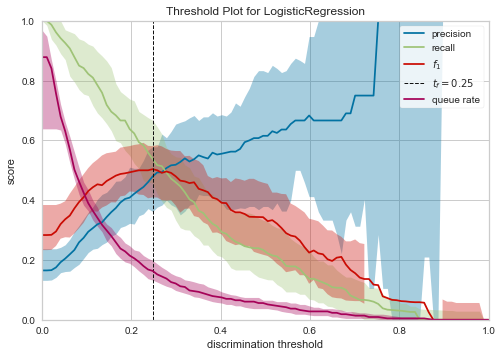

In [51]:
from sklearn.linear_model import LogisticRegression

#Baseline model        
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

telecom_churn_prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

## <a id='4.2'>4.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83       433
           1       0.40      0.70      0.51       101

    accuracy                           0.75       534
   macro avg       0.66      0.73      0.67       534
weighted avg       0.82      0.75      0.77       534

Accuracy Score: 0.7453183520599251
Area under curve: 0.7290833009397938 



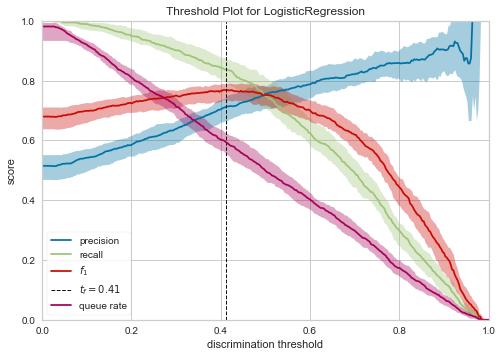

In [54]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote
smote = SMOTE(random_state = 0)
x_smote, y_smote = smote.fit_resample(x_train, y_train)
x_smote = pd.DataFrame(data = x_smote, columns=cols)
y_smote = pd.DataFrame(data = y_smote, columns=target_col)

logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote, x_smote, x_test, y_smote, y_test, "coefficients", threshold_plot=True)

## <a id='4.4'>4.4. Univariate Selection</a>
* Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
* uses the chi squared ($\chi^2$) statistical test for non-negative features to select the best features

In [55]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#dataframe with non negative values
x_df = df_telcom_og[cols]
y_df = df_telcom_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2, k = 3)
select = select.fit(x_df, y_df)

#create dataframe
score = pd.DataFrame({"features": cols, "scores": select.scores_, "p_values": select.pvalues_ })
score = score.sort_values(by = "scores", ascending=False)

#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols), "Numerical", "Categorical")

table_score = ff.create_table(score)
py.iplot(table_score)

#plot
trace1 = go.Scatter(x = score[score["feature_type"]=="Categorical"]["features"],
                   y = score[score["feature_type"]=="Categorical"]["scores"],
                   name = "Categorial", mode = "lines+markers",
                   marker = dict(color = "red", line = dict(width =1))
                   )

trace2 = go.Bar(x = score[score["feature_type"]=="Numerical"]["features"],
                y = score[score["feature_type"]=="Numerical"]["scores"], name = "Numerical",
                marker = dict(color = "royalblue", line = dict(width =1)),
                xaxis = "x2", yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90, zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1], tickangle = 90, gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2', gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='4.5'>4.5. Decision Tree Classifier</a>


In [56]:
def treeplot(classifier, cols, classnames):
    #plot decision tree
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True)
                  )
    display(graph)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       433
           1       0.86      0.69      0.77       101

    accuracy                           0.92       534
   macro avg       0.90      0.83      0.86       534
weighted avg       0.92      0.92      0.92       534

Accuracy Score: 0.9213483146067416
Area under curve: 0.8338325749434066 



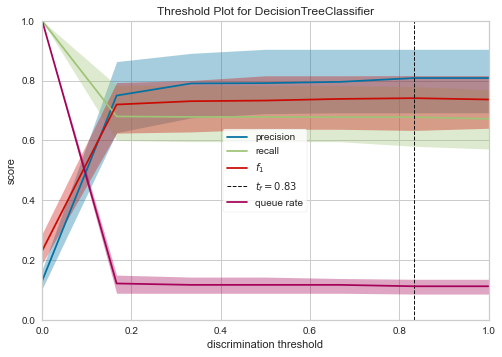

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
# from graphviz import Source
from IPython.display import SVG, display

decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

telecom_churn_prediction(decision_tree, x_train, x_test, y_train, y_test, "features", threshold_plot=True)


## <a id='4.6'>4.6. KNN Classifier</a>


Algorithm: KNeighborsClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       433
           1       0.91      0.21      0.34       101

    accuracy                           0.85       534
   macro avg       0.88      0.60      0.63       534
weighted avg       0.86      0.85      0.80       534

Accuracy Score: 0.846441947565543
Area under curve: 0.6016509272174331 



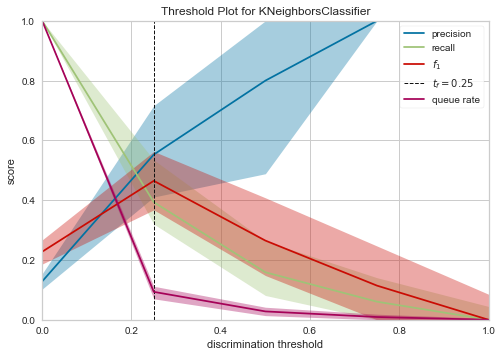

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')
telecom_churn_prediction(knn, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

## <a id='4.7'>4.7. Random Forest Classifier</a>
Random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       433
           1       0.95      0.56      0.71       101

    accuracy                           0.91       534
   macro avg       0.93      0.78      0.83       534
weighted avg       0.92      0.91      0.90       534

Accuracy Score: 0.9119850187265918
Area under curve: 0.7787140145885258 



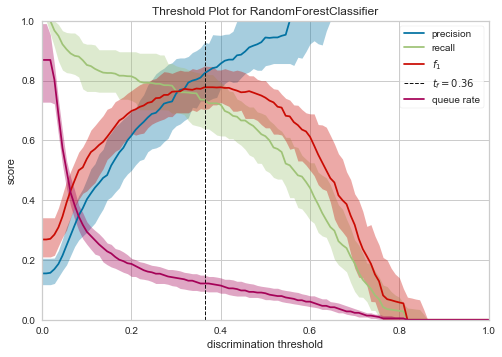

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

telecom_churn_prediction(rfc, x_train, x_test, y_train, y_test, 'features', threshold_plot=True)

## <a id='4.8'>4.8. Gaussian Naive Bayes</a>

Algorithm: GaussianNB

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       433
           1       0.49      0.34      0.40       101

    accuracy                           0.81       534
   macro avg       0.67      0.63      0.64       534
weighted avg       0.79      0.81      0.79       534

Accuracy Score: 0.8089887640449438
Area under curve: 0.6279011272951777 



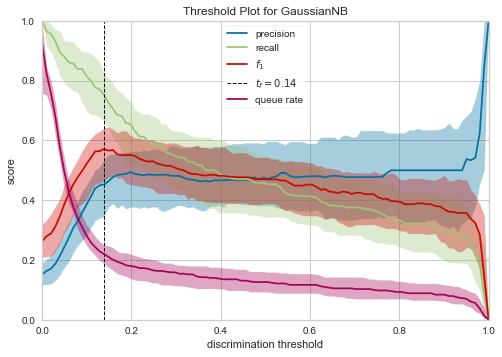

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(priors=None)

telecom_churn_prediction(gnb, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

## <a id='4.9'>4.9. Support Vector Machine</a>
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.   it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes.

### <a id='4.9.1'>4.9.1. Support Vector Machine (linear)</a>

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       433
           1       0.00      0.00      0.00       101

    accuracy                           0.81       534
   macro avg       0.41      0.50      0.45       534
weighted avg       0.66      0.81      0.73       534

Accuracy Score: 0.8108614232209738
Area under curve: 0.5 



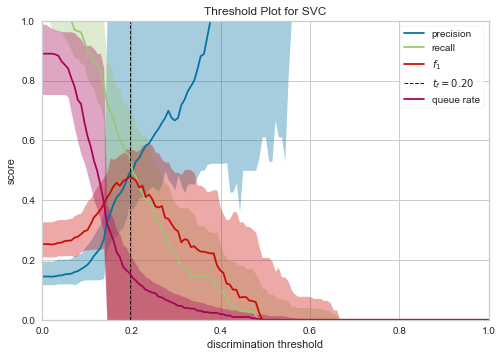

In [62]:
from sklearn.svm import SVC

#Support vector classifier using linear hyper plane
svc_lin  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

telecom_churn_prediction(svc_lin, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

### <a id='4.9.2'>4.9.2. Support Vector Machine (rbf)</a>

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       433
           1       0.84      0.60      0.70       101

    accuracy                           0.90       534
   macro avg       0.87      0.79      0.82       534
weighted avg       0.90      0.90      0.90       534

Accuracy Score: 0.9026217228464419
Area under curve: 0.7881233850867766 



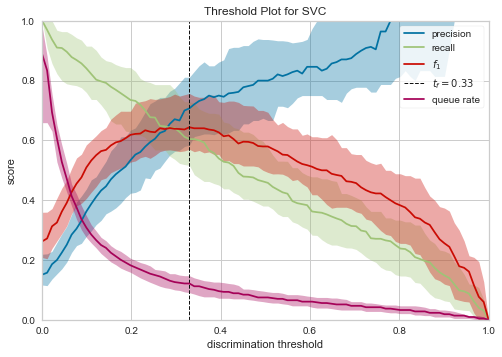

In [63]:
#support vector classifier using non-linear hyper plane ("rbf")
svc_rbf  = SVC(C=10.0, kernel='rbf', gamma=0.1, probability=True, random_state=124)   

telecom_churn_prediction(svc_rbf, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.11'>4.11. XGBoost  Classifier</a>

[13:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Algorithm: XGBClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       433
           1       0.96      0.75      0.84       101

    accuracy                           0.95       534
   macro avg       0.95      0.87      0.91       534
weighted avg       0.95      0.95      0.95       534

Accuracy Score: 0.947565543071161
Area under curve: 0.8727734205291199 



[13:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

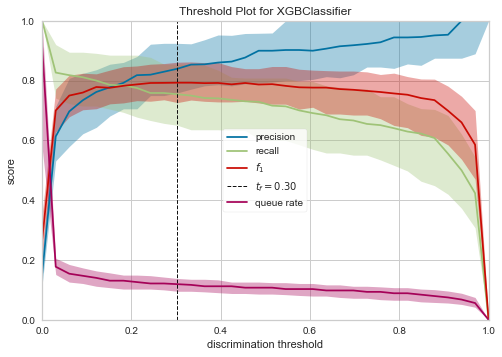

In [64]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth=7, min_child_weight=1, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    subsample=1)

telecom_churn_prediction(xgc, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

## <a id='4.12'>4.12. Gaussian Process Classifier</a> 

In [65]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier(random_state=124)

telecom_churn_prediction(gpc, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

Algorithm: GaussianProcessClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       433
           1       1.00      0.16      0.27       101

    accuracy                           0.84       534
   macro avg       0.92      0.58      0.59       534
weighted avg       0.87      0.84      0.79       534

Accuracy Score: 0.8408239700374532
Area under curve: 0.5792079207920792 



## <a id='4.13'>4.13. AdaBoost Classifier</a> 

Algorithm: AdaBoostClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       433
           1       0.63      0.29      0.39       101

    accuracy                           0.83       534
   macro avg       0.74      0.62      0.65       534
weighted avg       0.81      0.83      0.81       534

Accuracy Score: 0.8333333333333334
Area under curve: 0.6239338714471909 



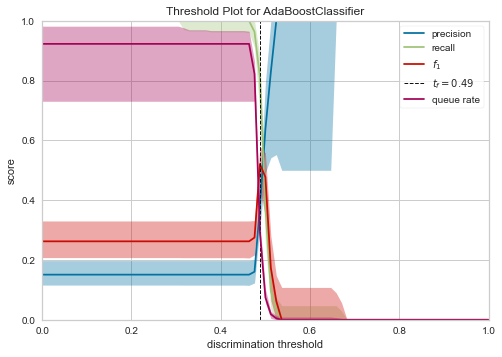

In [66]:
from sklearn.ensemble import AdaBoostClassifier

adac = AdaBoostClassifier(random_state=124)

telecom_churn_prediction(adac, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

## <a id='4.14'>4.14. GradientBoosting Classifier</a> 

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=124)

telecom_churn_prediction(gbc, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

Algorithm: GradientBoostingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       433
           1       0.93      0.74      0.82       101

    accuracy                           0.94       534
   macro avg       0.93      0.86      0.89       534
weighted avg       0.94      0.94      0.94       534

Accuracy Score: 0.9400749063670412
Area under curve: 0.8643587222463585 



## <a id='4.15'>4.15. Linear Discriminant Analysis</a> 

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

telecom_churn_prediction(lda, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

Algorithm: LinearDiscriminantAnalysis

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.89       433
           1       0.45      0.20      0.28       101

    accuracy                           0.80       534
   macro avg       0.64      0.57      0.58       534
weighted avg       0.76      0.80      0.77       534

Accuracy Score: 0.8033707865168539
Area under curve: 0.5712962751240481 



## <a id='4.15'>4.16. Quadratic Discriminant Analysis</a> 

Algorithm: QuadraticDiscriminantAnalysis

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       433
           1       0.56      0.42      0.48       101

    accuracy                           0.83       534
   macro avg       0.72      0.67      0.69       534
weighted avg       0.81      0.83      0.82       534

Accuracy Score: 0.8277153558052435
Area under curve: 0.669814556513388 



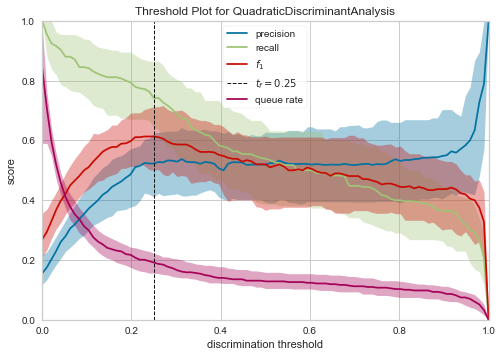

In [69]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

telecom_churn_prediction(qda, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.17'>4.17. Multi-layer Perceptron Classifier</a> 

Algorithm: MLPClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       433
           1       0.91      0.51      0.66       101

    accuracy                           0.90       534
   macro avg       0.90      0.75      0.80       534
weighted avg       0.90      0.90      0.89       534

Accuracy Score: 0.898876404494382
Area under curve: 0.7516520705188302 



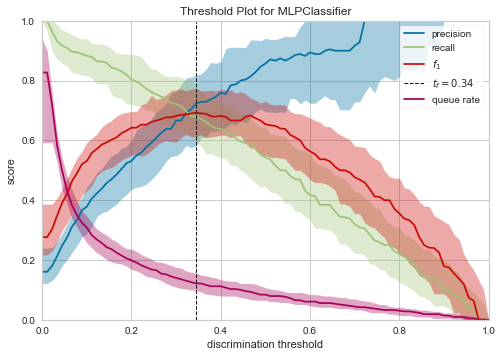

In [70]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000, random_state=124)

telecom_churn_prediction(mlp, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.18'>4.18. Bagging Classifier</a> 

Algorithm: BaggingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       433
           1       0.96      0.63      0.76       101

    accuracy                           0.93       534
   macro avg       0.94      0.81      0.86       534
weighted avg       0.93      0.93      0.92       534

Accuracy Score: 0.9250936329588015
Area under curve: 0.8133674799350605 



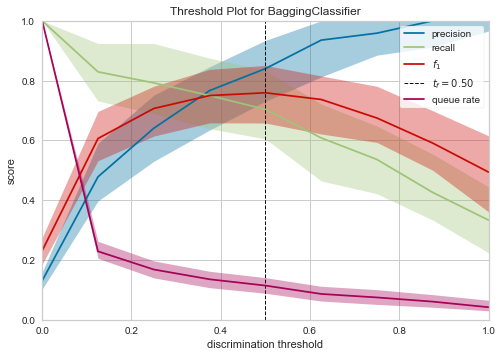

In [71]:
from sklearn.ensemble import BaggingClassifier

bgc = BaggingClassifier(random_state=124)

telecom_churn_prediction(bgc, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

# <a id='5'>5. Model performances over the training dataset</a>

In [72]:
#putting all the model names, model classes and the used columns in a dictionary
models = {'Logistic (Baseline)': [logit, cols],
          'Logistic (SMOTE)': [logit_smote, cols],  
          'Decision Tree': [decision_tree, cols], 
          'KNN Classifier': [knn, cols], 
          'Random Forest': [rfc, cols], 
          'Naive Bayes': [gnb, cols], 
          'SVM (linear)': [svc_lin, cols], 
          'SVM (rbf)': [svc_rbf, cols], 
          'XGBoost Classifier': [xgc, cols], 
          'Gaussian Process': [gpc, cols], 
          'AdaBoost': [adac, cols], 
          'GradientBoost': [gbc, cols], 
          'LDA': [lda, cols], 
          'QDA': [qda, cols], 
          'MLP Classifier': [mlp, cols], 
          'Bagging Classifier': [bgc, cols],
         }

## <a id='5.1'>5.1. Model performance metrics</a>

In [73]:
#gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    kappa_metric = cohen_kappa_score(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [74]:
#outputs for all models over the training dataset
model_performances_train = pd.DataFrame() 
for name in models:
    if name == 'Logistic (SMOTE)':
        model_performances_train = model_performances_train.append(model_report(models[name][0], 
                                                                                x_smote[models[name][1]], x_test[models[name][1]], 
                                                                                y_smote, y_test, name), ignore_index=True)
    else:
        model_performances_train = model_performances_train.append(model_report(models[name][0], x_train[models[name][1]], 
                                                                                x_test[models[name][1]], 
                                                                                y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)

[13:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## <a id='5.2'>5.2. Compare model metrics</a>

In [75]:
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],
                    x = df[metric],
                    orientation = "h", name = metric ,
                    marker = dict(line = dict(width =.7), color = color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title = title,
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )
    trace1 = output_tracer(df, "Accuracy", "#6699FF")
    trace2 = output_tracer(df, 'Recall', "red")
    trace3 = output_tracer(df, 'Precision', "#33CC99")
    trace4 = output_tracer(df, 'f1-score', "lightgrey")
    trace5 = output_tracer(df, 'Roc_auc', "magenta")
    trace6 = output_tracer(df, 'Kappa_metric', "#FFCC99")

    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [76]:
modelmetricsplot(df=model_performances_train, title="Model performances over the training dataset")

## <a id='5.3'>5.3. Confusion matrices for models</a>

In [77]:
def confmatplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)
            
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)

[13:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


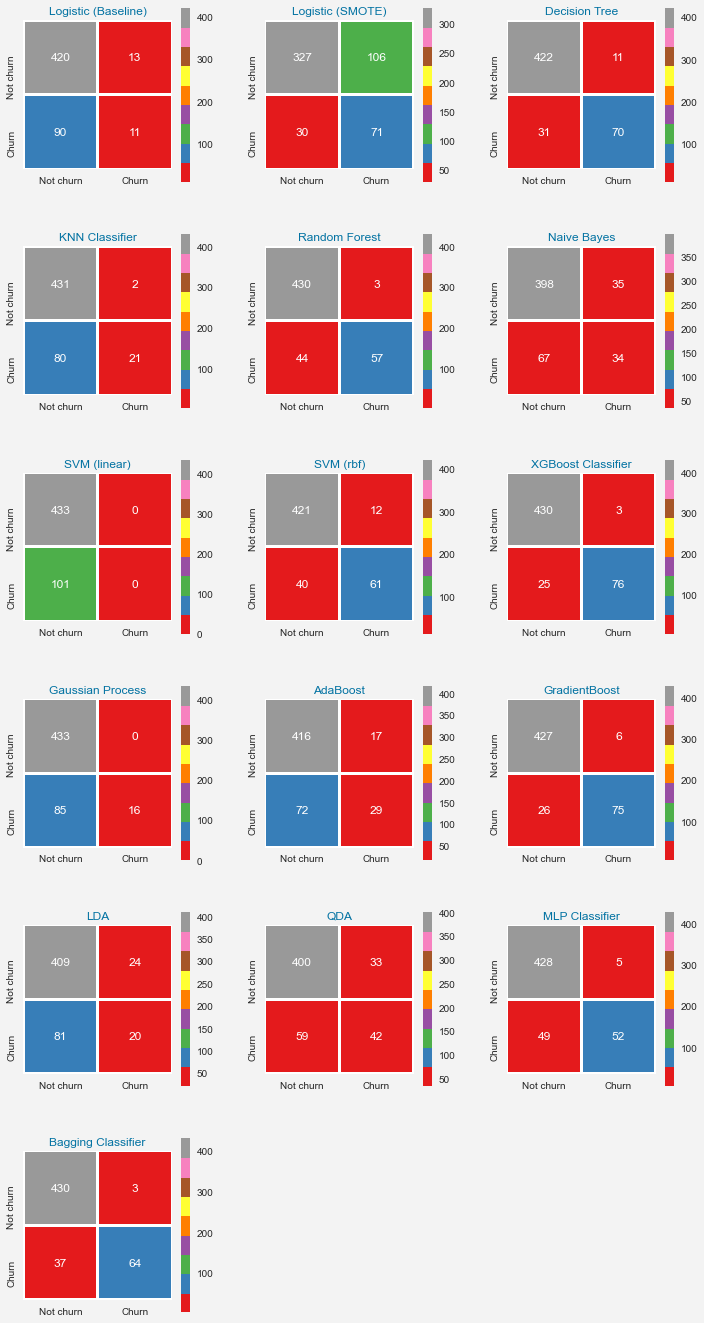

In [78]:
confmatplot(modeldict=models, df_train=[x_train, x_smote], df_test=x_test, 
             target_train=[y_train, y_smote], target_test=y_test, figcolnumber=3)

## <a id='5.4'>5.4. ROC - Curves  for models</a>

In [79]:
def rocplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        qx = plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
                        
            fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])
            plt.plot(fpr, tpr, linestyle = "dotted",
                     color = "royalblue", linewidth = 2,
                     label = "AUC = " + str(np.around(roc_auc_score(target_test, predictions), 3)))
            plt.plot([0,1],[0,1], linestyle = "dashed",
                     color = "orangered", linewidth = 1.5)
            plt.fill_between(fpr, tpr, alpha = .1)
            plt.fill_between([0, 1], [0, 1], color = "b")
            plt.legend(loc = "lower right",
                       prop = {"size" : 12})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xticks(np.arange(0, 1, .3))
            plt.yticks(np.arange(0, 1, .3))
       
        else:
            
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
                        
            fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])
            plt.plot(fpr, tpr, linestyle = "dotted",
                     color = "royalblue", linewidth = 2,
                     label = "AUC = " + str(np.around(roc_auc_score(target_test, predictions), 3)))
            plt.plot([0,1],[0,1], linestyle = "dashed",
                     color = "orangered", linewidth = 1.5)
            plt.fill_between(fpr, tpr, alpha = .1)
            plt.fill_between([0, 1], [0, 1], color = "b")
            plt.legend(loc = "lower right",
                       prop = {"size" : 12})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xticks(np.arange(0, 1, .3))
            plt.yticks(np.arange(0, 1, .3))

[13:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


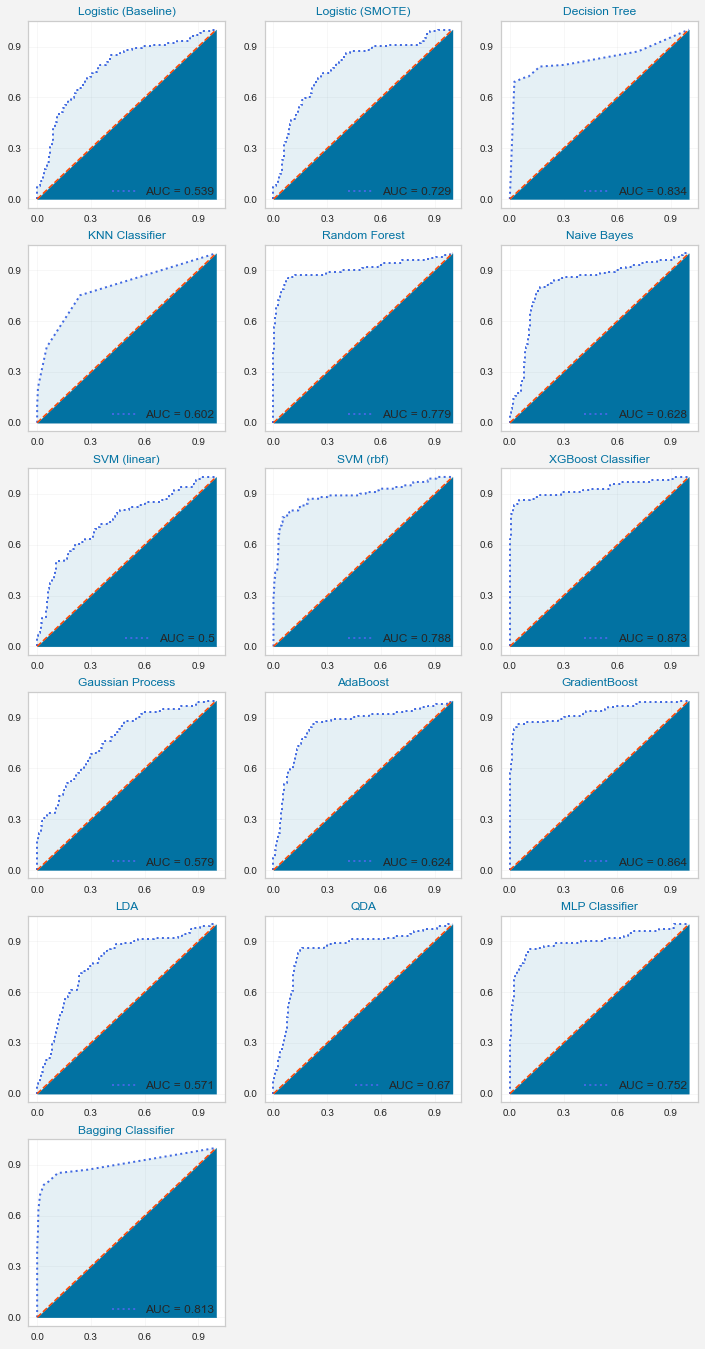

In [80]:
rocplot(modeldict=models, df_train=[x_train, x_smote], df_test=x_test, 
             target_train=[y_train, y_smote], target_test=y_test, figcolnumber=3)

## <a id='5.5'>5.5. Precision recall curves</a>

In [81]:
def prcplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        qx = plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
            
            recall, precision, thresholds = precision_recall_curve(target_test, probabilities[:,1])
            plt.plot(recall, precision, linewidth = 1.5,
                     label = ("avg_pcn: "+str(np.around(average_precision_score(target_test, predictions), 3))))
            plt.plot([0, 1], [0, 0], linestyle = "dashed")
            plt.fill_between(recall, precision, alpha = .1)
            plt.legend(loc = "lower left", prop = {"size": 10})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xlabel("recall", fontsize=7)
            plt.ylabel("precision", fontsize=7)
            plt.xlim([0.25,1])
            plt.yticks(np.arange(0, 1, .3))
            
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
            
            recall, precision, thresholds = precision_recall_curve(target_test, probabilities[:,1])
            plt.plot(recall, precision, linewidth = 1.5,
                     label = ("avg_pcn: "+str(np.around(average_precision_score(target_test, predictions), 3))))
            plt.plot([0, 1], [0, 0], linestyle = "dashed")
            plt.fill_between(recall, precision, alpha = .1)
            plt.legend(loc = "lower left", prop = {"size": 10})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xlabel("recall", fontsize=7)
            plt.ylabel("precision", fontsize=7)
            plt.xlim([0.25,1])
            plt.yticks(np.arange(0, 1, .3))

In [82]:
prcplot(modeldict=models, df_train=[x_train, x_smote], df_test=x_test, 
             target_train=[y_train, y_smote], target_test=y_test, figcolnumber=3)

[13:32:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# <a id='6'>6. Model performances over the principal test dataset</a>
## <a id='6.1'>6.1. Model performance metrics</a>

In [84]:
#outputs for all models over the principal test dataset
model_performances_test = pd.DataFrame() 
for name in models:
    if name == 'Logistic (SMOTE)':
        model_performances_test = model_performances_test.append(model_report(models[name][0], 
                                                                              x_smote[models[name][1]], telcom_test[models[name][1]], 
                                                                              y_smote, telcom_test[target_col], name), ignore_index=True)
    else:
        model_performances_test = model_performances_test.append(model_report(models[name][0], 
                                                                              x_train[models[name][1]], telcom_test[models[name][1]], 
                                                                              y_train, telcom_test[target_col], name), ignore_index=True)
        
table_test = ff.create_table(np.round(model_performances_test, 4))
py.iplot(table_test)

[13:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## <a id='6.2'>6.2. Compare model metrics</a>

In [85]:
modelmetricsplot(df=model_performances_test, title="Model performances over the principal test dataset")

## <a id='6.3'>6.3. Confusion matrices for models</a>

[13:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


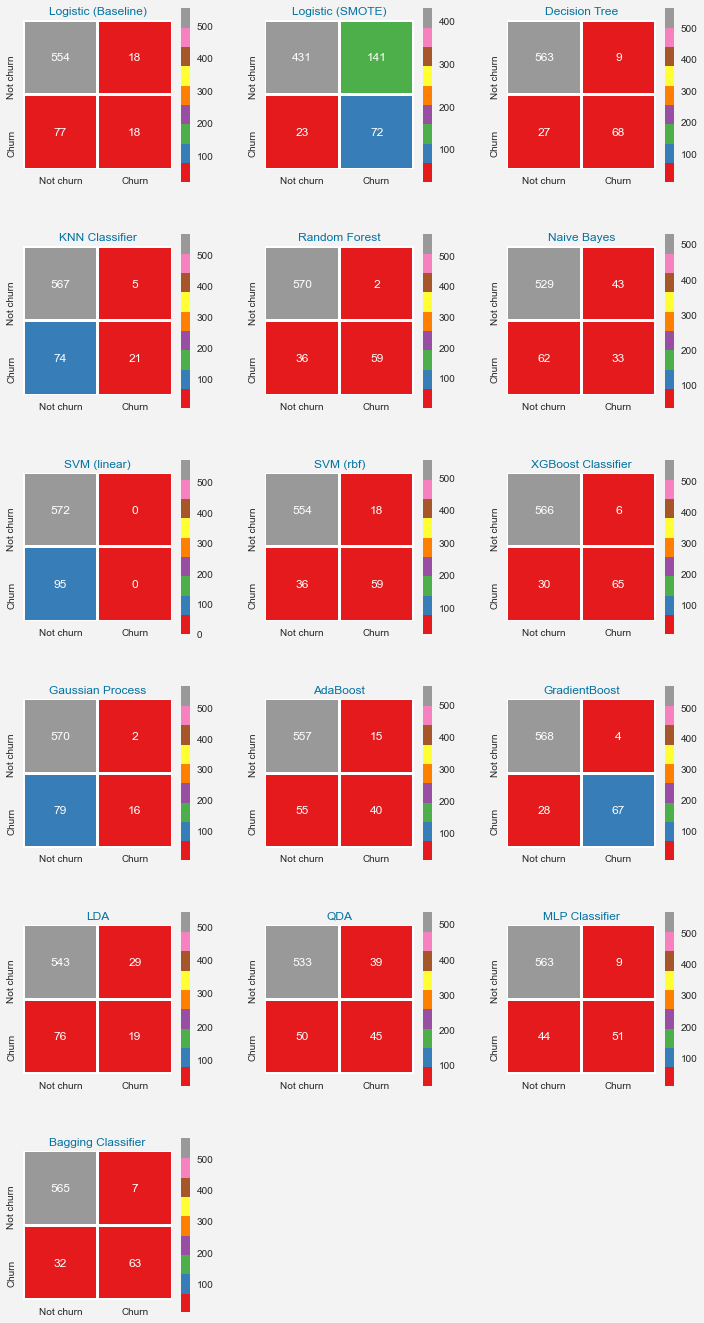

In [86]:
confmatplot(modeldict=models, df_train=[x_train, x_smote], df_test=telcom_test[cols], 
             target_train=[y_train, y_smote], target_test=telcom_test[target_col], figcolnumber=3)

## <a id='6.4'>6.4. ROC - Curves for models</a>

[13:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


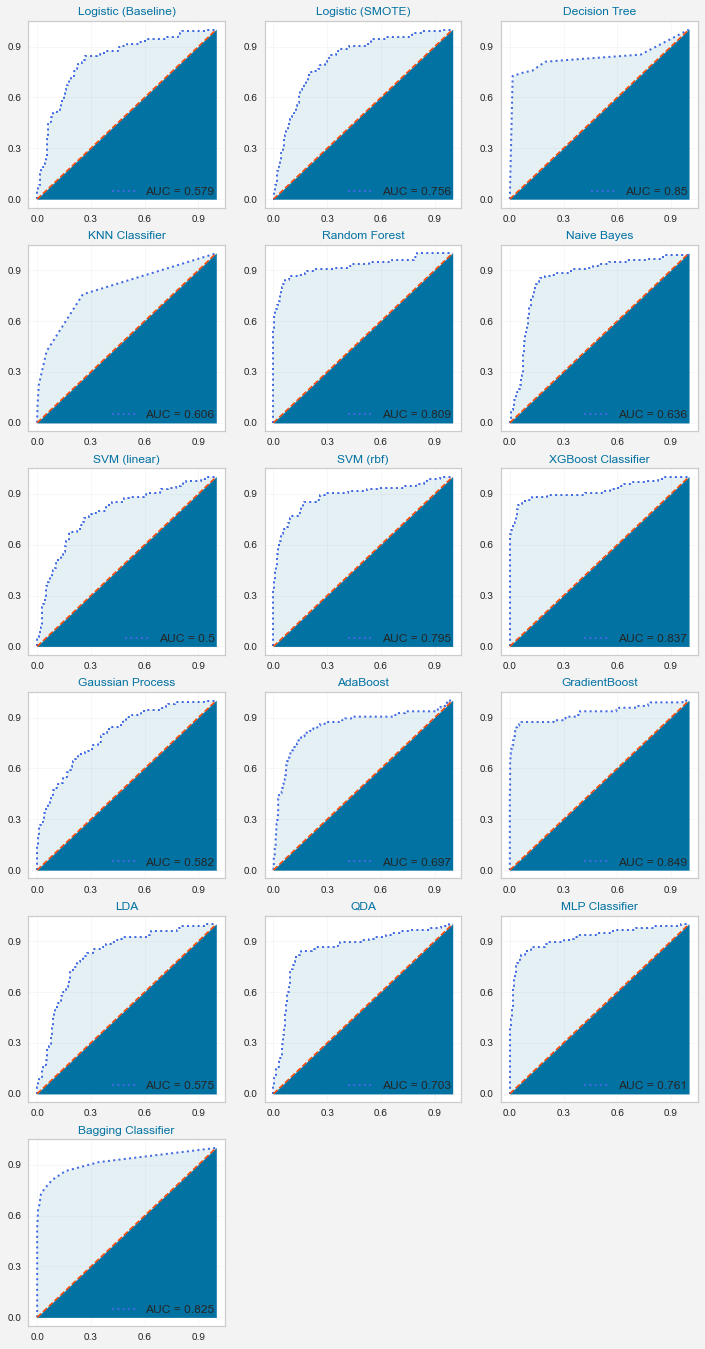

In [87]:
rocplot(modeldict=models, df_train=[x_train, x_smote], df_test=telcom_test[cols], 
             target_train=[y_train, y_smote], target_test=telcom_test[target_col], figcolnumber=3)

## <a id='6.5'>6.5. Precision recall curves</a>

In [89]:
prcplot(modeldict=models, df_train=[x_train, x_smote], df_test=telcom_test[cols], 
             target_train=[y_train, y_smote], target_test=telcom_test[target_col], figcolnumber=3)

[13:34:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
